In [4]:
%matplotlib inline
import pandas as pd

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [15]:
c=cast
c=c[(c.character == 'Superman') | (c.character == "Batman")]
c.groupby(['year','character']).size()
c=c.unstack()
c=c.fillna(0)

In [7]:
c=cast
c=c[(c.character == 'Superman')|(c.character == 'Batman')]
c=c.groupby(['year','character']).size()
c=c.unstack()
c=c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [20]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

AttributeError: 'DataFrame' object has no attribute 'Superman'

In [12]:
c=cast
c=c[(c.character == 'Batman')|(c.character == 'Superman')]
c=c.groupby(['year','character']).size()
c=c.unstack()
c

character,Batman,Superman
year,,
1938,1.0,NaN
1940,1.0,NaN
1943,1.0,NaN
1948,NaN,1.0
1949,2.0,NaN
1950,NaN,1.0
1951,NaN,2.0
1953,2.0,NaN
1954,NaN,5.0


In [19]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

AttributeError: 'DataFrame' object has no attribute 'Superman'

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [22]:
c=cast
c=c[(c.character == 'Batman') | (c.character == 'Superman')]
c=c.groupby(['year','character']).size()
c=c.unstack()
#c=c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,NaN
1940,1.0,NaN
1943,1.0,NaN
1948,NaN,1.0
1949,2.0,NaN


In [24]:
d=(c['Batman'] - c['Superman'])
print('Batman years: ')
print(len(d[d < 0]))

Batman years: 
2


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

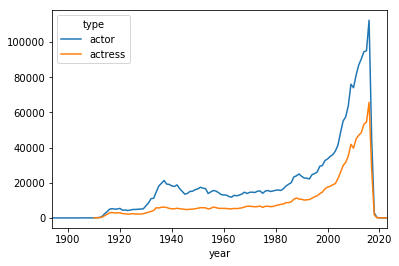

In [35]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack('type')
c.plot()

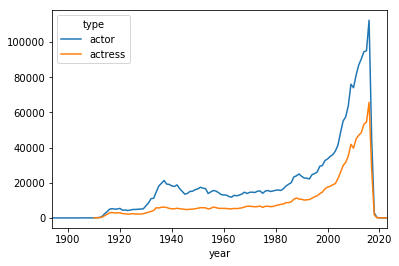

In [30]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

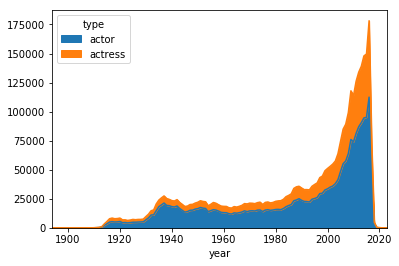

In [32]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

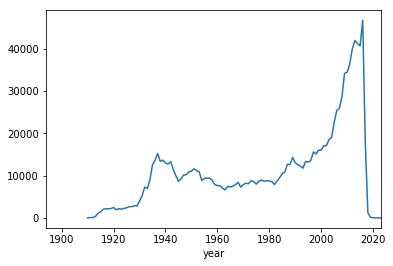

In [39]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack()
(c.actor - c.actress).plot()

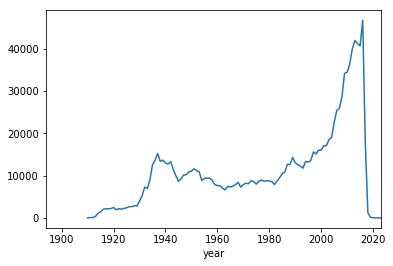

In [21]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack()
(c.actor-c.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

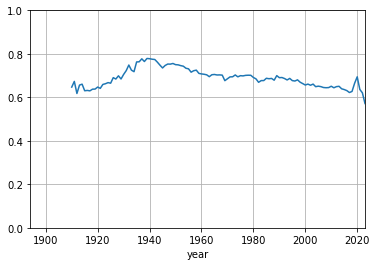

In [43]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1],grid='on')

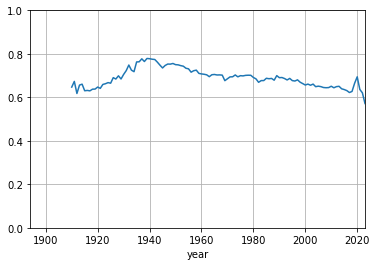

In [41]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1],grid='on')

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [3]:
c=cast
c=c[c.n == 2]
c=c.groupby(['year','type']).size()
c=c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

NameError: name 'cast' is not defined

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

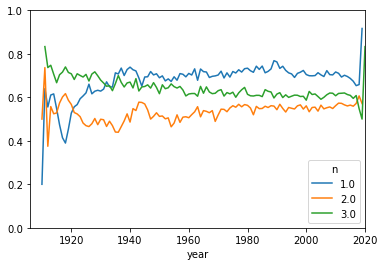

In [47]:
c=cast
c=c[c.n <=3]
c=c.groupby(['year','type','n']).size()
c=c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])